In [3]:
#next is making the map after this 
#fix the time graph 

#ask Praveen do I need to do Facebook prophet 
#look for subway crimes in Staten Island 
#ask Praveen what went in in 2014 subway crime 

In [ ]:
import pandas as pd
import pmdarima as pm
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("paper", font_scale = 1.4)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#no fbprophet import 

In [47]:
df3 = pd.read_csv('df2.csv')

In [48]:
df3.head()

,Unnamed: 0,Complaint_Date,Complaint_Time,Crime,Crime_Description,Offense,Borough,X_COORD_CD,Y_COORD_CD,Suspect_Age,Suspect_Gender,Patrol_Borough,Station_Name,Victim Age,Victim_Race,Victim_Gender,Complaint_Date_Time
0,0,06/09/2018,15:54:00,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PURS",FELONY,BRONX,1010257.0,248767.0,<18,M,PATROL BORO BRONX,TREMONT AVENUE,45-64,WHITE HISPANIC,F,2018-06-09 15:54:00
1,1,05/19/2018,12:25:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,990886.0,213048.0,45-64,M,PATROL BORO MAN SOUTH,42 ST.-GRAND CENTRAL,25-44,WHITE,F,2018-05-19 12:25:00
2,2,11/04/2018,00:00:00,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,FELONY,MANHATTAN,980772.0,194845.0,25-44,M,PATROL BORO MAN SOUTH,SOUTH FERRY,65+,BLACK,M,2018-11-04 00:00:00
3,3,01/18/2018,12:23:00,POSSESSION OF STOLEN PROPERTY,"STOLEN PROPERTY 3,POSSESSION",MISDEMEANOR,MANHATTAN,989294.0,215445.0,25-44,M,PATROL BORO MAN SOUTH,47-50 STS./ROCKEFELLER CTR.,25-44,WHITE,M,2018-01-18 12:23:00
4,4,12/29/2018,21:30:00,JOSTLING,JOSTLING,MISDEMEANOR,BRONX,1004749.0,240880.0,45-64,F,PATROL BORO BRONX,161 ST.-YANKEE STADIUM,25-44,BLACK HISPANIC,M,2018-12-29 21:30:00


In [49]:
#did to_datetime function to convert the string value to datetime object. 
#reassigned the df2 to make complaint_date_time a permanent datetime object 
#do datetime conversion BEFORE setting index

df3['Complaint_Date_Time'] = pd.to_datetime(df3['Complaint_Date_Time'])

In [50]:
df3 = df3.set_index('Complaint_Date_Time')

# ARIMA Model/ SARIMAX 

In [51]:
# make a copy of crimes dataset to work on, so we don't mess up the original dataset 
df3_copy = df3.copy()
df3_copy.head()

,Unnamed: 0,Complaint_Date,Complaint_Time,Crime,Crime_Description,Offense,Borough,X_COORD_CD,Y_COORD_CD,Suspect_Age,Suspect_Gender,Patrol_Borough,Station_Name,Victim Age,Victim_Race,Victim_Gender
Complaint_Date_Time,,,,,,,,,,,,,,,,
2018-06-09 15:54:00,0,06/09/2018,15:54:00,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PURS",FELONY,BRONX,1010257.0,248767.0,<18,M,PATROL BORO BRONX,TREMONT AVENUE,45-64,WHITE HISPANIC,F
2018-05-19 12:25:00,1,05/19/2018,12:25:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,990886.0,213048.0,45-64,M,PATROL BORO MAN SOUTH,42 ST.-GRAND CENTRAL,25-44,WHITE,F
2018-11-04 00:00:00,2,11/04/2018,00:00:00,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,FELONY,MANHATTAN,980772.0,194845.0,25-44,M,PATROL BORO MAN SOUTH,SOUTH FERRY,65+,BLACK,M
2018-01-18 12:23:00,3,01/18/2018,12:23:00,POSSESSION OF STOLEN PROPERTY,"STOLEN PROPERTY 3,POSSESSION",MISDEMEANOR,MANHATTAN,989294.0,215445.0,25-44,M,PATROL BORO MAN SOUTH,47-50 STS./ROCKEFELLER CTR.,25-44,WHITE,M
2018-12-29 21:30:00,4,12/29/2018,21:30:00,JOSTLING,JOSTLING,MISDEMEANOR,BRONX,1004749.0,240880.0,45-64,F,PATROL BORO BRONX,161 ST.-YANKEE STADIUM,25-44,BLACK HISPANIC,M


In [52]:
#drops race and gender because that's not changing over time. Give model cols that will be predictive of
#the crimes that will happen...races of people don't change over time. 

# drop columns
df3_copy = df3_copy.drop(['Suspect_Gender', 'Victim_Race', 'Victim_Gender', 
                         'Complaint_Time', 'Unnamed: 0', 'Crime_Description', 'Offense',
                         'X_COORD_CD', 'Y_COORD_CD', 'Suspect_Age', 'Station_Name'], axis = 1)

In [53]:
df3_copy.head()

,Complaint_Date,Crime,Borough,Patrol_Borough,Victim Age
Complaint_Date_Time,,,,,
2018-06-09 15:54:00,06/09/2018,GRAND LARCENY,BRONX,PATROL BORO BRONX,45-64
2018-05-19 12:25:00,05/19/2018,FORGERY,MANHATTAN,PATROL BORO MAN SOUTH,25-44
2018-11-04 00:00:00,11/04/2018,DANGEROUS WEAPONS,MANHATTAN,PATROL BORO MAN SOUTH,65+
2018-01-18 12:23:00,01/18/2018,POSSESSION OF STOLEN PROPERTY,MANHATTAN,PATROL BORO MAN SOUTH,25-44
2018-12-29 21:30:00,12/29/2018,JOSTLING,BRONX,PATROL BORO BRONX,25-44


In [54]:
df3_copy = df3_copy.drop(['Patrol_Borough', 'Victim Age', 'Complaint_Date'], axis = 1)

In [55]:
df3_copy.head()

,Crime,Borough
Complaint_Date_Time,,
2018-06-09 15:54:00,GRAND LARCENY,BRONX
2018-05-19 12:25:00,FORGERY,MANHATTAN
2018-11-04 00:00:00,DANGEROUS WEAPONS,MANHATTAN
2018-01-18 12:23:00,POSSESSION OF STOLEN PROPERTY,MANHATTAN
2018-12-29 21:30:00,JOSTLING,BRONX


In [57]:
# count number of crimes by borough
df3_copy = df3_copy.groupby(['Borough'], as_index = True).resample('M').agg({"Crime":'size'})
# rename crime column
df3_copy.rename(columns = {'Crime':'Crime_Number'}, inplace = True)
# view data
df3_copy.head()

Crime_Number
Borough Complaint_Date_Time              
BRONX   2006-01-31                      5
        2006-02-28                      4
        2006-03-31                      5
        2006-04-30                      1
        2006-05-31                      6

In [58]:
# stationarity check with Dickey-Fuller test

def stationarity_check(ts):
    
    '''Enter time series dataframe to get results of Dickey-Fuller Test and see if the original time series is stationary'''
    
    dftest = adfuller(ts.dropna())
    print('\nResults of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [59]:
# decompose time series so we can observe trend, seasionality, and residuals

def decomposition(ts):
    
    '''This function decomposes time series so we can observe trend, seasonality, and residual plots'''
    
    decomposition = seasonal_decompose(ts)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(figsize=(10,7))
    plt.subplot(511)
    plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(512)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(513)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(514)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

In [60]:
# calculates the residual in order to do stationary test
def residual(ts):
    
    '''This function calculate the residuals to do the stationary test in case the original data is not stationary'''
    
    decomposition = seasonal_decompose(ts)
    residual = decomposition.resid
    residual.dropna(inplace=True)
    return residual

In [61]:
# run auto arima and search for the best parameters and then using SARIMAX to fit our models

def best_parameters(ts):
    
    '''Enter time series. This function will let auto_arima search for hyperparameters, then SARIMAX will fit these 
    hyperparameters to get the best model with lowest AIC'''
    
    best_orders = pm.auto_arima(ts, start_p = 0, start_q = 0, max_p = 2, max_q = 2, m = 12, seasonal = True, 
                                   stationary = False, stepwise = True, trend = 'ct', suppress_warnings = True, 
                                   trace = False, error_action = 'ignore')
    best_model = SARIMAX(ts, order = best_orders.order, seasonal_order = best_orders.seasonal_order).fit()
    best_parameters = []
    best_parameters.append([best_orders.order, best_orders.seasonal_order, best_model.aic]) 
    print('ARIMA {} x {}, AIC Calculated: {}'.format(best_orders.order, best_orders.seasonal_order, best_model.aic))
    print(best_model.summary())
    return best_model

In [62]:
# get predictions for the best model
def get_predictions(ts, model, steps = 84, plot=True, show=True):
    
    '''Parameters: time series dataframe, model, steps, plot, and show.
    This function gets one-step-ahead forecast and compares it to the actual points.
    In addition, it also makes future predictions for the number of steps passed as parameters, plot results with 95% confidence
    interval, and calculates RMSE & percentage change'''
    
    # Get preditions from model for the last 3 years of data period
    pred = model.get_prediction(start='2017-01-31', dynamic=False)
    conf = pred.conf_int()

    # Plot observed and predicted values with confidence interval
    if plot:
        ax = ts['2006':].plot(label='Observed', figsize=(10, 8))
        pred.predicted_mean.plot(ax=ax, label='One-step-ahead Forecast', alpha=.5)
        ax.fill_between(conf.index,
                        conf.iloc[:, 0],
                        conf.iloc[:, 1], color='g', alpha=.3,
                        label='Confidence Interval')
        ax.set_ylabel('Value')
        ax.set_xlabel('Year')
        plt.title('Observations vs Predictions')
        ax.legend()
        plt.show()
        
    # Compare real and predicted values to validade model and compute the rmse
    predicted = pred.predicted_mean
    real = ts['2017-01-31':].Crime_Number
    mse = np.square(np.subtract(real,predicted)).mean()
    rmse = math.sqrt(mse)
        
    # Get forecast and confidence interval for steps ahead in future
    future = model.get_forecast(steps=steps, dynamic=True)
    future_conf = future.conf_int()

    # Plot future forecast with confidence interval
    if plot:
        ax = ts['2006':].plot(label='Observed', figsize=(10, 8))
        future.predicted_mean.plot(ax=ax, label='Forecast')
        ax.fill_between(future_conf.index,
                        future_conf.iloc[:, 0],
                        future_conf.iloc[:, 1], color='g', alpha=.3)
        ax.fill_betweenx(ax.get_ylim(), 
                         pd.to_datetime('2026-12-31'), 
                         predicted.index[-1], alpha=.1, zorder=-1)
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Crimes')
        plt.title('Future Forecast')
        ax.legend()
        plt.show()
        
    # show prediction for end of step-period 
    forecast = future.predicted_mean[-1]
    upper = future_conf.iloc[-1,1]
    lower = future_conf.iloc[-1,0]
    predictions = {}
    predictions['Upper Bound'] = upper
    predictions['Expected Forecast'] = forecast
    predictions['Lower Bound'] = lower
    predictions = pd.DataFrame.from_dict(predictions, orient='index', columns=['Prediction'])
  
    # calculate return percentages
    crime_2019 = ts.loc['2019-12-31']
    forecast_2026 = forecast
    forecast_lower = lower
    forecast_upper = upper
    return_percentage_predictions = {}
    predicted_percent_change = ((forecast_2026- crime_2019) / crime_2019)*100
    upper_percent_change = ((forecast_upper - crime_2019) / crime_2019)*100
    lower_percent_change = ((forecast_lower - crime_2019) / crime_2019)*100
    return_percentage_predictions['Predicted % Change'] = predicted_percent_change
    return_percentage_predictions['Upper % Change'] = upper_percent_change
    return_percentage_predictions['Lower % Change'] = lower_percent_change
    return_percentage_predictions = pd.DataFrame.from_dict(return_percentage_predictions,orient='index')
    
    if show:
        print(predictions)
        
        print('\n' + f'The RMSE of our forecast is {round(rmse, 2)}' + '\n')
        
        print(return_percentage_predictions)

In [64]:
bronx_crimes = df3_copy.loc['BRONX']
bronx_crimes

,Crime_Number
Complaint_Date_Time,
2006-01-31,5
2006-02-28,4
2006-03-31,5
2006-04-30,1
2006-05-31,6
...,...
2021-08-31,27
2021-09-30,41
2021-10-31,32


In [65]:
bronx_stationarity_check = stationarity_check(bronx_crimes)


Results of Dickey-Fuller Test: 

Test Statistic                  -0.564948
p-value                          0.878707
#Lags Used                       5.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64


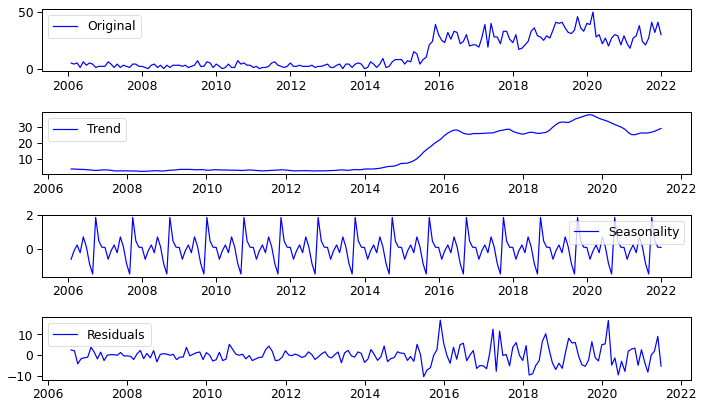

In [66]:
bronx_decomposition = decomposition(bronx_crimes)

In [67]:
bronx_residual_stationarity_check = stationarity_check(residual(bronx_crimes))


Results of Dickey-Fuller Test: 

Test Statistic                -1.005281e+01
p-value                        1.398053e-17
#Lags Used                     4.000000e+00
Number of Observations Used    1.750000e+02
Critical Value (1%)           -3.468280e+00
Critical Value (5%)           -2.878202e+00
Critical Value (10%)          -2.575653e+00
dtype: float64


In [68]:
best_bronx = best_parameters(bronx_crimes)

ARIMA (2, 1, 2) x (0, 0, 0, 12), AIC Calculated: 1155.8670591868145
                               SARIMAX Results                                
Dep. Variable:           Crime_Number   No. Observations:                  192
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -572.934
Date:                Mon, 14 Nov 2022   AIC                           1155.867
Time:                        22:53:53   BIC                           1172.128
Sample:                    01-31-2006   HQIC                          1162.454
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5500      0.174     -3.161      0.002      -0.891      -0.209
ar.L2          0.2930      0.120      2.448      0.014       0.

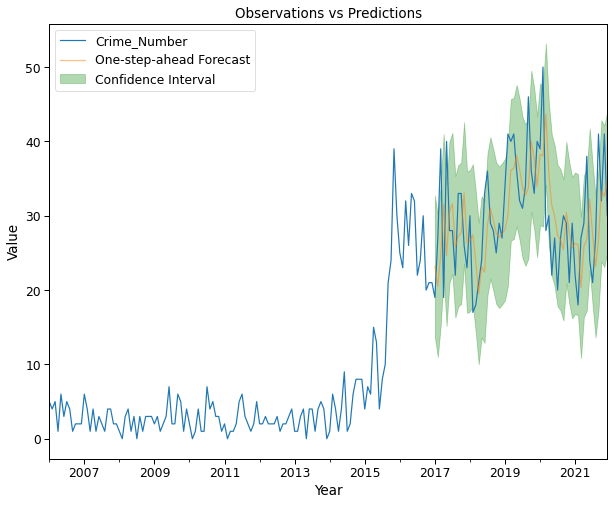

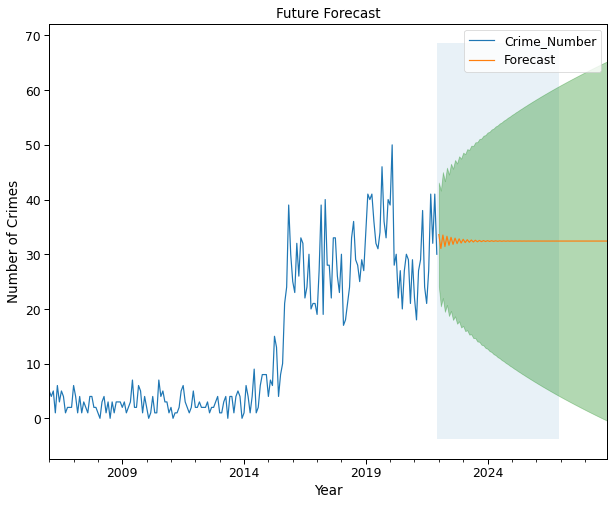

                   Prediction
Upper Bound         65.268623
Expected Forecast   32.411426
Lower Bound         -0.445771

The RMSE of our forecast is 6.99

                    Crime_Number
Lower % Change       -101.114427
Predicted % Change    -18.971435
Upper % Change         63.171557


In [69]:
forecast_bronx_crimes = get_predictions(bronx_crimes, best_bronx, steps=84, plot=True, show=True)

In [71]:
brooklyn_crimes = df3_copy.loc['BROOKLYN']
brooklyn_crimes

,Crime_Number
Complaint_Date_Time,
2006-01-31,19
2006-02-28,14
2006-03-31,22
2006-04-30,7
2006-05-31,13
...,...
2021-08-31,52
2021-09-30,48
2021-10-31,67


In [72]:
brooklyn_stationarity_check = stationarity_check(brooklyn_crimes)


Results of Dickey-Fuller Test: 

Test Statistic                  -0.462045
p-value                          0.899213
#Lags Used                       6.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64


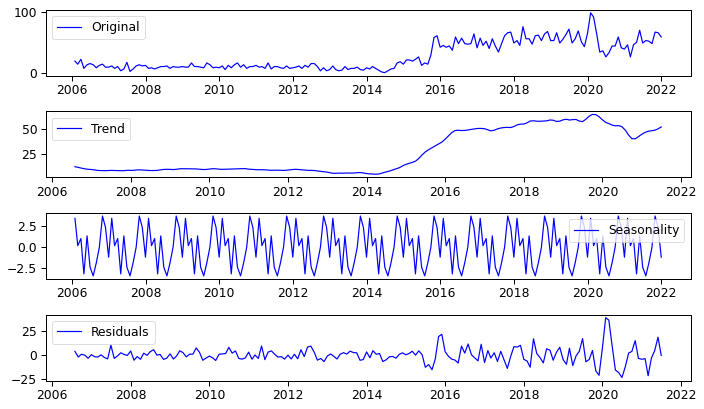

In [73]:
brooklyn_decomposition = decomposition(brooklyn_crimes)

In [74]:
brooklyn_residual_stationarity_check = stationarity_check(residual(brooklyn_crimes))


Results of Dickey-Fuller Test: 

Test Statistic                -1.151591e+01
p-value                        4.150757e-21
#Lags Used                     4.000000e+00
Number of Observations Used    1.750000e+02
Critical Value (1%)           -3.468280e+00
Critical Value (5%)           -2.878202e+00
Critical Value (10%)          -2.575653e+00
dtype: float64


In [75]:
best_brooklyn = best_parameters(brooklyn_crimes)

ARIMA (1, 1, 1) x (0, 0, 0, 12), AIC Calculated: 1377.546311047597
                               SARIMAX Results                                
Dep. Variable:           Crime_Number   No. Observations:                  192
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -685.773
Date:                Mon, 14 Nov 2022   AIC                           1377.546
Time:                        22:56:18   BIC                           1387.303
Sample:                    01-31-2006   HQIC                          1381.498
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3954      0.076      5.229      0.000       0.247       0.544
ma.L1         -0.8113      0.054    -14.911      0.000      -0.9

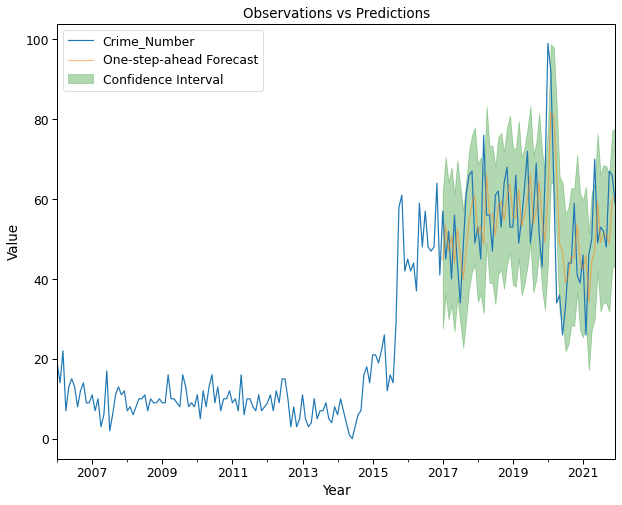

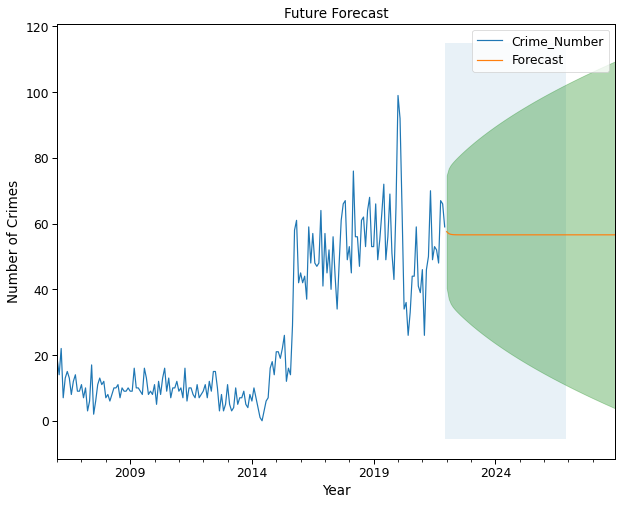

                   Prediction
Upper Bound        109.381233
Expected Forecast   56.586590
Lower Bound          3.791947

The RMSE of our forecast is 12.76

                    Crime_Number
Lower % Change        -94.166236
Predicted % Change    -12.943708
Upper % Change         68.278820


In [76]:
forecast_brooklyn_crimes = get_predictions(brooklyn_crimes, best_brooklyn, steps=84, plot=True, show=True)

In [83]:
manhattan_crimes = df3_copy.loc['MANHATTAN']
manhattan_crimes

,Crime_Number
Complaint_Date_Time,
2005-08-31,1
2005-09-30,0
2005-10-31,0
2005-11-30,0
2005-12-31,0
...,...
2021-08-31,78
2021-09-30,84
2021-10-31,74


In [84]:
manhattan_stationarity_check = stationarity_check(manhattan_crimes)


Results of Dickey-Fuller Test: 

Test Statistic                  -0.043531
p-value                          0.954781
#Lags Used                      15.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


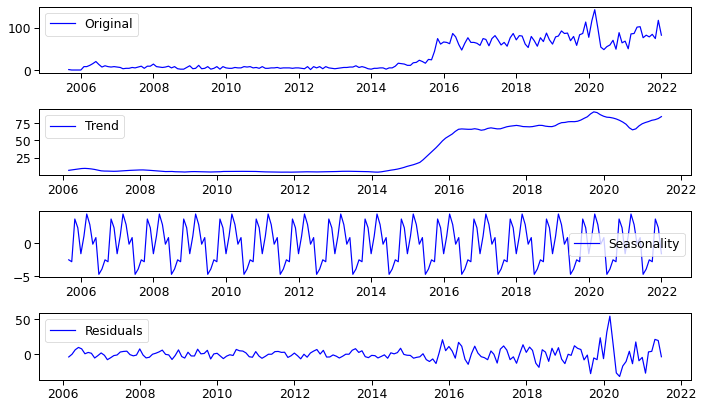

In [85]:
manhattan_decomposition = decomposition(manhattan_crimes)

In [86]:
manhattan_residual_stationarity_check = stationarity_check(residual(manhattan_crimes))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.234047
p-value                          0.000577
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


In [87]:
best_manhattan = best_parameters(manhattan_crimes)

ARIMA (1, 1, 1) x (2, 0, 0, 12), AIC Calculated: 1488.2550158470517
                                      SARIMAX Results                                      
Dep. Variable:                        Crime_Number   No. Observations:                  197
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood                -739.128
Date:                             Mon, 14 Nov 2022   AIC                           1488.255
Time:                                     23:00:12   BIC                           1504.646
Sample:                                 08-31-2005   HQIC                          1494.891
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3627      0.075      

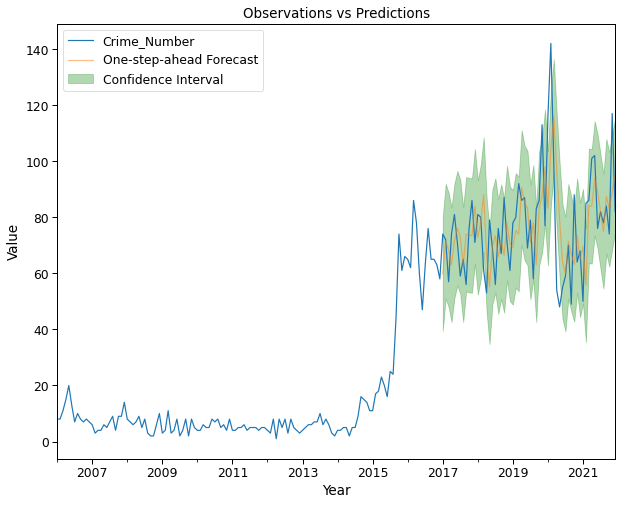

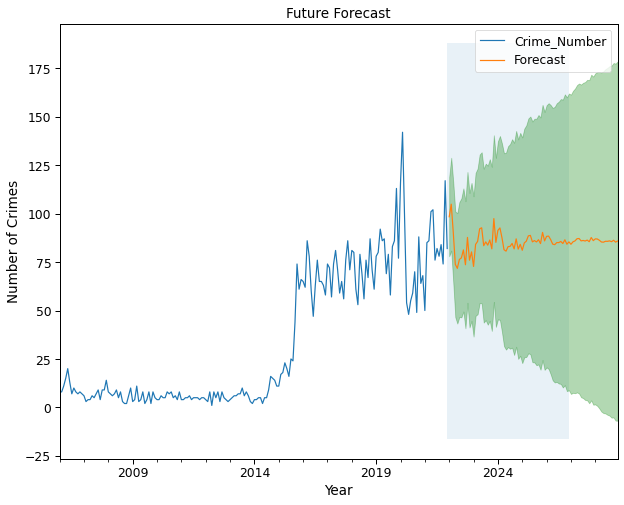

                   Prediction
Upper Bound        178.578003
Expected Forecast   85.838713
Lower Bound         -6.900577

The RMSE of our forecast is 16.37

                    Crime_Number
Lower % Change       -108.961789
Predicted % Change     11.478848
Upper % Change        131.919484


In [88]:
forecast_manhattan_crimes = get_predictions(manhattan_crimes, best_manhattan, steps=84, plot=True, show=True)

In [90]:
queens_crimes = df3_copy.loc['QUEENS']
queens_crimes

,Crime_Number
Complaint_Date_Time,
2006-01-31,1
2006-02-28,2
2006-03-31,1
2006-04-30,4
2006-05-31,2
...,...
2021-08-31,19
2021-09-30,29
2021-10-31,23


In [91]:
queens_stationarity_check = stationarity_check(queens_crimes)


Results of Dickey-Fuller Test: 

Test Statistic                  -0.836279
p-value                          0.808232
#Lags Used                       4.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64


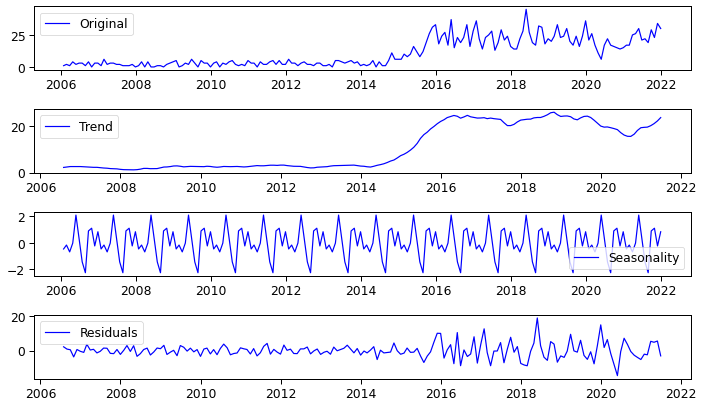

In [92]:
queens_decomposition = decomposition(queens_crimes)

In [93]:
queens_residual_stationarity_check = stationarity_check(residual(queens_crimes))


Results of Dickey-Fuller Test: 

Test Statistic                -9.090651e+00
p-value                        3.832487e-15
#Lags Used                     5.000000e+00
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64


In [94]:
best_queens = best_parameters(queens_crimes)

ARIMA (0, 1, 2) x (0, 0, 0, 12), AIC Calculated: 1163.4017352107862
                               SARIMAX Results                                
Dep. Variable:           Crime_Number   No. Observations:                  192
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -578.701
Date:                Mon, 14 Nov 2022   AIC                           1163.402
Time:                        23:02:11   BIC                           1173.159
Sample:                    01-31-2006   HQIC                          1167.354
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5873      0.049    -11.926      0.000      -0.684      -0.491
ma.L2         -0.1310      0.053     -2.464      0.014      -0.

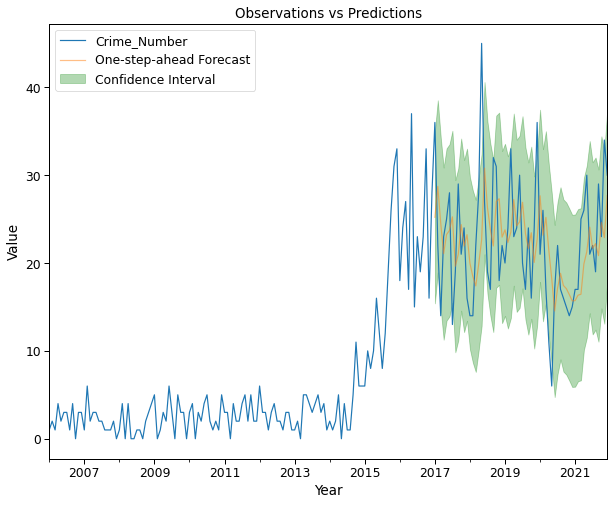

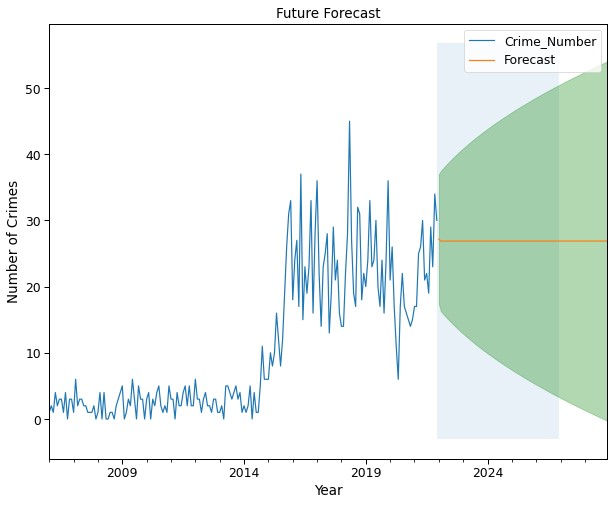

                   Prediction
Upper Bound         54.035152
Expected Forecast   26.884066
Lower Bound         -0.267020

The RMSE of our forecast is 6.91

                    Crime_Number
Lower % Change       -100.741721
Predicted % Change    -25.322039
Upper % Change         50.097644


In [95]:
forecast_queens_crimes = get_predictions(queens_crimes, best_queens, steps=84, plot=True, show=True)